# Predictive Modeling of California Housing Prices 

## Introduction

This project explores the California Housing dataset to identify and understand the key factors influencing housing prices using statistical analysis, exploratory data analysis (EDA), visualization, and predictive modeling. It applies machine learning models to predict home values based on demographic and geographic features. The goal is to generate insights and build models that can predict housing prices effectively


## 1. Importing Libraries & Dataset

To begin the project, we import essential Python libraries for data manipulation, visualization, and analysis:

* pandas: for handling and processing structured data.
* numpy: for numerical operations.
* matplotlib.pyplot and seaborn: for creating static, animated, and interactive visualizations.
  
* scikit-learn (sklearn):
  1. model_selection: for splitting data into training and test sets.
  2. linear_model, tree, ensemble: for regression modeling (Linear, Decision Tree, Random Forest, Gradient Boosting).
  3. metrics: for evaluating model performance using MAE, RMSE, and R².
  4. cluster.KMeans: for clustering geographic housing patterns.


* xgboost: for implementing the XGBoost Regressor, an advanced gradient boosting technique.
* os: for loading the dataset from the Kaggle input directory.
* warnings: to suppress irrelevant warnings for cleaner outputs.

We load the California Housing dataset directly from Kaggle's file directory using os.walk().

In [2]:
# Data manipulation

import pandas as pd
import numpy as np

# Visualization (optional, for scatter or cluster plots)

import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn - Model training & evaluation

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

#Dataset from kaggle

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#avoid warnings

import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

/kaggle/input/california-housing-prices/housing.csv


## 2. Basic Understanding & Data Cleaning

we perform an initial exploration of the dataset to understand its structure, types of variables, and overall quality. This includes:

* Displaying the first few rows to get a sense of the data (head()).
* Checking data types, column names, and non-null counts using info().
* Generating basic statistical summaries with describe().
* Identifying and handling missing values or inconsistencies.
* Renaming/dropping irrelevant columns if needed.
* Ensuring data types are appropriate for analysis and modeling.

Preparing clean, reliable data that can be effectively analyzed and used for building predictive models.

In [3]:
housing_data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Summary statistics

housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
numeric_cols = housing_data.select_dtypes(include=[np.number])
housing_data[numeric_cols.columns] = numeric_cols.replace([np.inf, -np.inf], np.nan)
housing_data.dropna(inplace = True)

In [8]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
housing_data.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## 3. Exploratory Data Analysis (EDA)

Visualizations (using Matplotlib / Seaborn):
 * Histogram of median_income, median_house_value
 * Correlation heatmap
 * Scatter plot of median_income vs median_house_value
 * Box plots for numeric features
 * Bar plot of house value by ocean_proximity

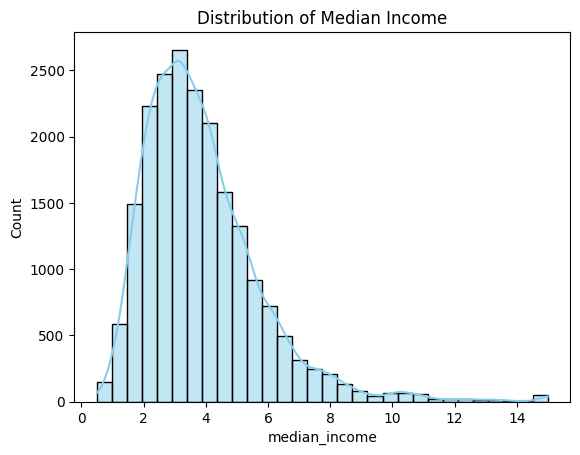

In [10]:
# Histogram of median_income
sns.histplot(data = housing_data, x="median_income",kde=True, bins=30, color='skyblue')
plt.title('Distribution of Median Income')
plt.xlabel('median_income')
plt.ylabel('Count')
plt.show()

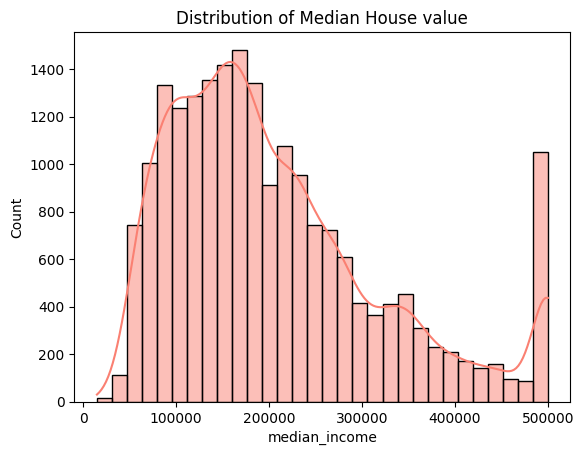

In [11]:
# Histogram of median_house_value
sns.histplot(data = housing_data, x="median_house_value",kde=True, bins=30, color='salmon')
plt.title('Distribution of Median House value')
plt.xlabel('median_income')
plt.ylabel('Count')
plt.show()

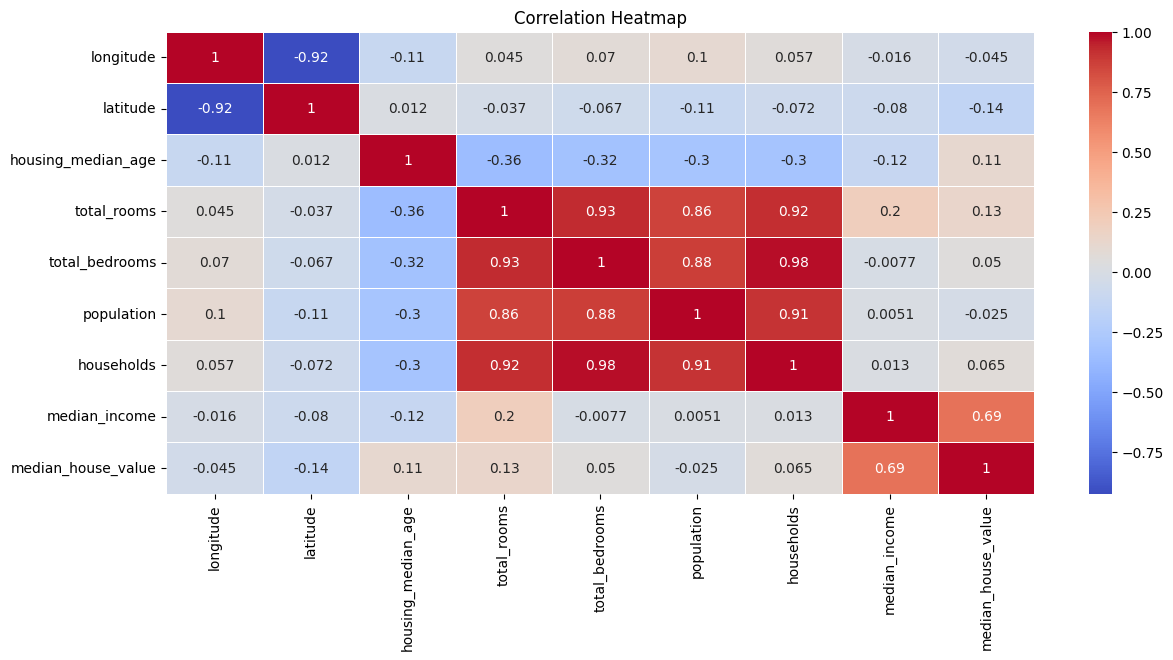

In [12]:
# Computing correlation matrix

plt.figure(figsize=(14, 6))
correlation_matrix = housing_data.corr(numeric_only=True)  # excluding non-numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

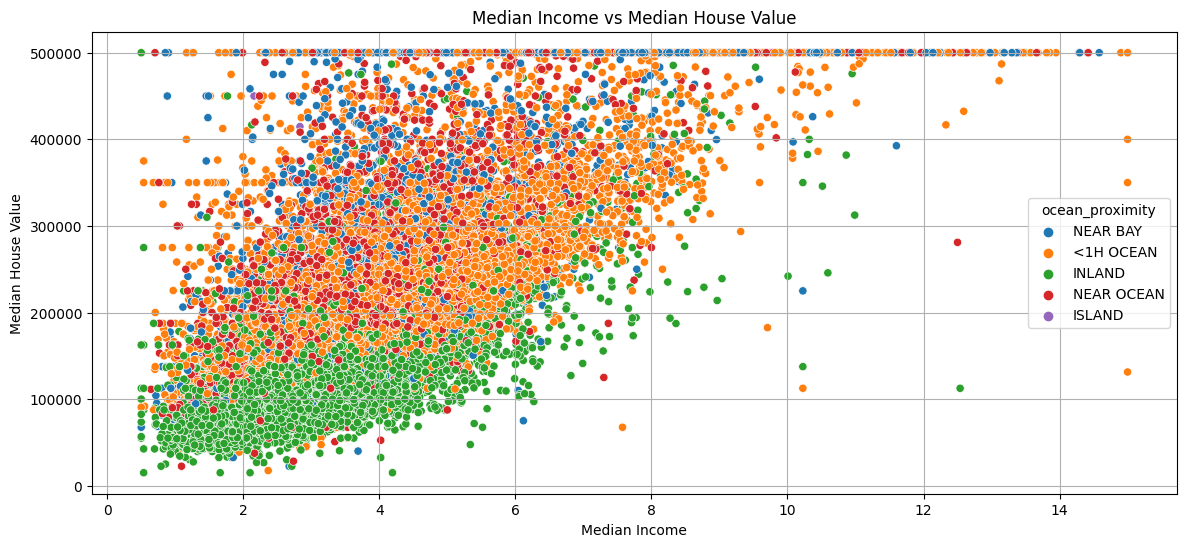

In [13]:
#scatter plot of Median Income vs Median House Value

plt.figure(figsize=(14, 6))
sns.scatterplot(data=housing_data, x='median_income', y='median_house_value', hue='ocean_proximity')
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

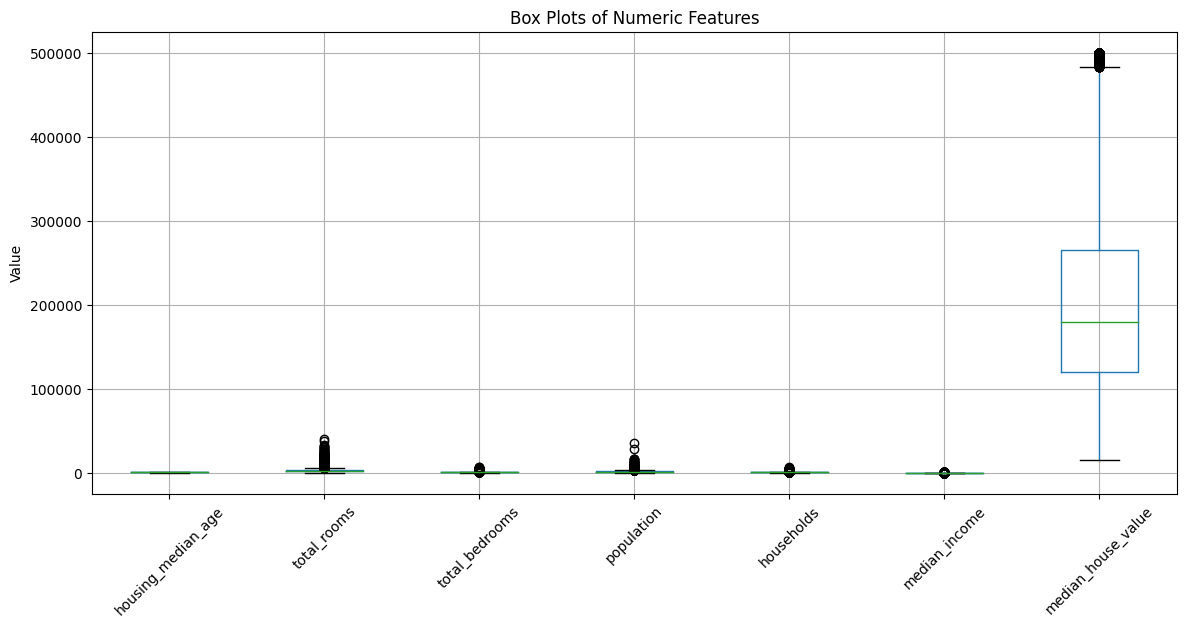

In [14]:
#Boxplot for numeric features

numeric_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 
                   'population', 'households', 'median_income', 'median_house_value']

plt.figure(figsize=(14, 6))
housing_data[numeric_columns].boxplot(rot=45)
plt.title('Box Plots of Numeric Features')
plt.ylabel('Value')
plt.grid(True)
plt.show()

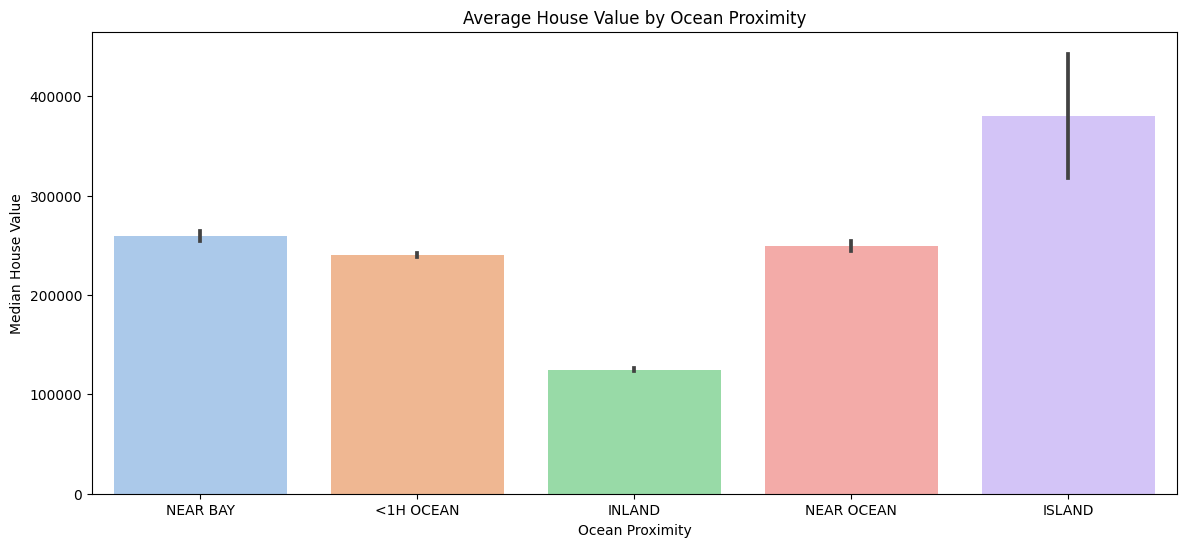

In [15]:
#Bar Plot of House Value by ocean_proximity

plt.figure(figsize=(14, 6))
sns.barplot(data=housing_data, x='ocean_proximity', y='median_house_value', palette='pastel')
plt.title('Average House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

## 4. Feature Engineering

Creating new features such as:
 * Rooms per household = total_rooms / households
 * Bedrooms per room = total_bedrooms / total_rooms
 * Population per household = population / households
 * Convert categorical feature ocean_proximity using one-hot encoding.

In [16]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [17]:
#One-hot encode the categorical column 'ocean_proximity'
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'], drop_first=True)

In [18]:
#Creating new features:

housing_data['rooms_per_household'] = housing_data['total_rooms'] / housing_data['households']
housing_data['bedrooms_per_room'] = housing_data['total_bedrooms'] / housing_data['total_rooms']
housing_data['population_per_household'] = housing_data['population'] / housing_data['households']


In [19]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False,6.281853,0.172096,2.181467


## 5. Geographical Analysis

Since our dataset have longitude and latitude, lets do location-based insights:
* Plot house prices on a map (scatter plot with color scale by price).
* Clustering of locations based on housing patterns.
* Use Seaborn or Folium for maps.

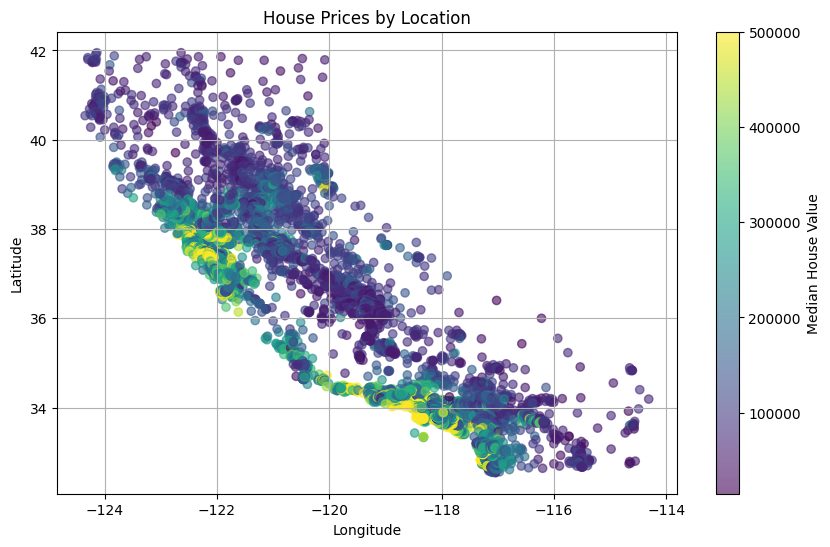

In [20]:
#Scatter Plot of House Prices by Location

plt.figure(figsize=(10, 6))
scatter = plt.scatter(housing_data['longitude'], housing_data['latitude'],
                      c=housing_data['median_house_value'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House Prices by Location")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


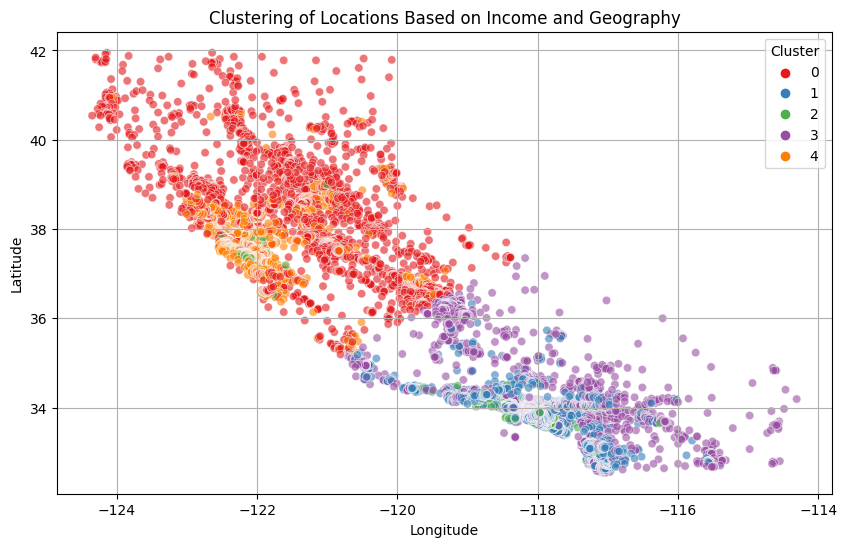

In [21]:
#KMeans Clustering Based on Location & Median Income

# Selecting features for clustering
geo_income = housing_data[['longitude', 'latitude', 'median_income']].copy()

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
housing_data['cluster'] = kmeans.fit_predict(geo_income)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_data, x='longitude', y='latitude', hue='cluster', palette='Set1', alpha=0.6)
plt.title("Clustering of Locations Based on Income and Geography")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [22]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

# Sample data (optional: limit to avoid rendering issues)
sample_df = housing_data.sample(1000, random_state=42)

# Create the map
m = folium.Map(location=[sample_df['latitude'].mean(), sample_df['longitude'].mean()], zoom_start=6)
marker_cluster = MarkerCluster().add_to(m)

# Add markers
for idx, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        popup=f"${row['median_house_value']}",
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save("map.html")

# Display map in notebook using IFrame
IFrame("map.html", width=1000, height=600)

## 6. Modeling – Predicting House Prices

Using machine learning to predict median_house_value.
Steps:
* Split data into features (X) and target (y)
* Train/Test Split
* Apply algorithms:
* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor
* Optional: Gradient Boosting / XGBoost

## Evaluate models using:

* R² Score
* Mean Absolute Error
* Mean Squared Error

In [23]:
# Separate features and target
X = housing_data.drop("median_house_value", axis=1)
y = housing_data["median_house_value"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediction
y_pred_lr_model = lr_model.predict(X_test)

# Evaluation
print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lr_model))
print("RMSE:", mean_squared_error(y_test, y_pred_lr_model, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_lr_model))

Linear Regression
MAE: 49782.08828051246
RMSE: 69069.63894805165
R2 Score: 0.6511479373434568


In [25]:
# Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Prediction
y_pred_dt_model = dt_model.predict(X_test)

# Evaluation
print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_dt_model))
print("RMSE:", mean_squared_error(y_test, y_pred_dt_model, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_dt_model))

Linear Regression
MAE: 43928.91044776119
RMSE: 68931.85537458127
R2 Score: 0.6525383642291785


In [26]:
# Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction
y_pred_rf_model = rf_model.predict(X_test)

# Evaluation
print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_rf_model))
print("RMSE:", mean_squared_error(y_test, y_pred_rf_model, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_rf_model))

Linear Regression
MAE: 32950.38123073159
RMSE: 50801.34020978474
R2 Score: 0.8112802889053445


In [27]:
# Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Prediction
y_pred_gb_model = gb_model.predict(X_test)

# Evaluation
print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_gb_model))
print("RMSE:", mean_squared_error(y_test, y_pred_gb_model, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_gb_model))

Linear Regression
MAE: 37198.888740780625
RMSE: 54190.34518577499
R2 Score: 0.7852610830308485


## 7. Comparing All Models in One Table

In [28]:
#Comaparing all models

results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "RMSE": [
        mean_squared_error(y_test, y_pred_lr_model, squared=False),
        mean_squared_error(y_test, y_pred_dt_model, squared=False),
        mean_squared_error(y_test, y_pred_rf_model, squared=False),
        mean_squared_error(y_test, y_pred_gb_model, squared=False)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr_model),
        r2_score(y_test, y_pred_dt_model),
        r2_score(y_test, y_pred_rf_model),
        r2_score(y_test, y_pred_gb_model)
    ]
})

results

,Model,RMSE,R2 Score
0,Linear Regression,69069.638948,0.651148
1,Decision Tree,68931.855375,0.652538
2,Random Forest,50801.340210,0.811280
3,Gradient Boosting,54190.345186,0.785261


## 8.  Conclusion

In this project, I explored various regression models to predict housing prices based on geographical and socio-economic features from the California Housing dataset. After evaluating models using RMSE and R² Score, the results show:

Random Forest Regressor performed the best with an RMSE of ₹50,801 and R² of 0.81, indicating strong predictive power.

Gradient Boosting Regressor also performed well with slightly higher RMSE but more stable generalization.

Linear Regression and Decision Tree showed significantly lower performance, suggesting they are less suitable for capturing the nonlinear relationships in the data.

Hence,Random Forest is the most effective model for this dataset, providing a strong balance between accuracy and generalization. This model is suitable for deployment or further fine-tuning for production-level applications.